## Table of Contents
* [1.Dataset 1](#Dataset_1)
    * [1.1 Data Preprocessing](#1.1-DPL)
        * [1.1.1 Working with Null Values](#1.1.1-Working_with_Null_Values)
    * [1.2 Exploratory Data Analysis](#1.2-EDAL/PDSL)
        * [1.2.1 Visualizing cities having the highest Average Carbon Emissions throughout](#Visualizing_cities_having_the_highest_Average_Carbon_Emissions_throughout)
        * [1.2.2 Visualizing cities having the lowest Average Carbon Emissions throughout](#Visualizing_cities_having_the_lowest_Average_Carbon_Emissions_throughout)
        * [1.2.4 Visualizing cities having Maximum Carbon Emissions](#Visualizing_cities_having_Maximum_Carbon_Emissions)
        * [1.2.5 Visualizing cities having Minimum Carbon Emissions](#Visualizing_cities_having_Minimum_Carbon_Emissions)
        * [1.2.6 State wise Visualization](#State_wise_Visualization)
* [Dataset 2](#Dataset_2)
    * [Data Preprocessing](#2.1-DPL)
        * [2.1.1 Dropping Unnecessary Coloumns](#2.1.1-Dropping_columns)
        * [2.2.2 Working with Null Values](#2.1.2-Working_with_Null_Values)
    * [Exploratory Data Analysis & Python for Data Science](#2.2-EDAL/PDSL)

# Dataset_1
>This Dataset consists of the Average, Maximum and Minimum Carbon Emissions of the most important cities of each state in India

In [1]:
import pandas as pd

In [2]:
ds1 = pd.read_csv("CO_India.csv")

In [3]:
ds1.dtypes

State        object
City         object
Avg(ppb)    float64
Max(ppb)    float64
Min(ppb)    float64
dtype: object

In [4]:
ds1.head(6)

,State,City,Avg(ppb),Max(ppb),Min(ppb)
0,Andhra_Pradesh,Amaravati,28.0,30.0,13.0
1,Andhra_Pradesh,Rajamahendravaram,23.0,46.0,2.0
2,Andhra_Pradesh,Tirupati,41.0,54.0,38.0
3,Andhra_Pradesh,Visakhapatnam,20.0,92.0,4.0
4,Assam,Guwahati,42.0,86.0,10.0
5,Bihar,Aurangabad,NaN,NaN,NaN


In [5]:
ds1.corr()

,Avg(ppb),Max(ppb),Min(ppb)
Avg(ppb),1.000000,0.796220,0.583442
Max(ppb),0.796220,1.000000,0.357921
Min(ppb),0.583442,0.357921,1.000000


In [6]:
ds1.describe()

,Avg(ppb),Max(ppb),Min(ppb)
count,137.00000,138.000000,135.000000
mean,54.20438,83.500000,25.200000
std,30.30049,40.930821,23.009018
min,3.00000,6.000000,1.000000
25%,32.00000,52.000000,10.000000
50%,49.00000,82.000000,19.000000
75%,71.00000,111.000000,33.000000
max,152.00000,194.000000,110.000000


## 1.1-DPL


In [7]:
#To check the number of cities in each state
state = ds1.groupby('State').count()
state['City']

State
Andhra_Pradesh       4
Assam                1
Bihar               14
Chandigarh           1
Chhattisgarh         1
Delhi                1
Gujarat              5
Haryana             21
Himachal Pradesh     1
Karnataka           18
Kerala               8
Madhya Pradesh      13
Maharashtra          9
Manipur              1
Meghalaya            1
Mizoram              1
Nagaland             1
Odisha               2
Puducherry           1
Punjab               8
Rajasthan            8
TamilNadu            3
Telangana            1
Tripura              1
Uttar_Pradesh       17
Uttarakhand          1
West_Bengal          5
Name: City, dtype: int64

In [8]:
#Check the number of null values in each column
ds1.isna().sum()

State        0
City         0
Avg(ppb)    11
Max(ppb)    10
Min(ppb)    13
dtype: int64

#### 1.1.1-Working_with_Null_Values

In [9]:
import numpy as np

In [10]:
#Locating Null Values in Avg(ppb) column

ds1.replace(np.nan, 'null', inplace=True)

data1 = ds1.loc[ds1["Avg(ppb)"]=='null']
data1.drop('Max(ppb)', axis=1, inplace=True)
data1.drop('Min(ppb)', axis=1, inplace=True)

ds1.replace('null', np.nan, inplace=True)

print(data1.count())
data1


State       11
City        11
Avg(ppb)    11
dtype: int64


C:\Users\tanus\AppData\Local\Temp\ipykernel_17528\1128046468.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop('Max(ppb)', axis=1, inplace=True)
C:\Users\tanus\AppData\Local\Temp\ipykernel_17528\1128046468.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop('Min(ppb)', axis=1, inplace=True)


,State,City,Avg(ppb)
5,Bihar,Aurangabad,null
13,Bihar,Manguraha,null
25,Gujarat,Vapi,null
49,Karnataka,Bagalkot,null
51,Karnataka,Bidar,null
58,Karnataka,Haveri,null
60,Karnataka,Kalaburgi,null
75,Madhya Pradesh,Bhopal,null
84,Madhya Pradesh,Sagar,null
93,Maharashtra,Nashik,null


In [11]:
state = ds1.groupby(ds1.State)

br = state.get_group('Bihar')
gj = state.get_group('Gujarat')
ka = state.get_group('Karnataka')
mp = state.get_group('Madhya Pradesh')
mh = state.get_group('Maharashtra')
rj = state.get_group('Rajasthan')

print(f"{br}\n{gj}\n{ka}\n{mp}\n{mh}\n{rj}")

    State          City  Avg(ppb)  Max(ppb)  Min(ppb)
5   Bihar    Aurangabad       NaN       NaN       NaN
6   Bihar     Begusarai      54.0      74.0      51.0
7   Bihar       Bettiah      42.0      48.0      30.0
8   Bihar  Bihar Sharif      31.0      36.0      22.0
9   Bihar         Buxar      76.0      82.0      35.0
10  Bihar     Darbhanga      61.0      87.0      55.0
11  Bihar          Gaya      47.0      84.0      24.0
12  Bihar       Hajipur      33.0      43.0      14.0
13  Bihar     Manguraha       NaN       NaN       NaN
14  Bihar      Motihari      64.0      85.0      52.0
15  Bihar   Muzaffarpur      94.0     115.0      44.0
16  Bihar         Patna      74.0     107.0      63.0
17  Bihar        Purnia      34.0      58.0      21.0
18  Bihar        Rajgir      68.0      76.0      48.0
      State         City  Avg(ppb)  Max(ppb)  Min(ppb)
22  Gujarat    Ahmedabad      43.0     107.0      32.0
23  Gujarat   Ankleshwar      82.0     116.0      60.0
24  Gujarat  Gandhinagar 

In [12]:
#Filling Null values in Avg(ppb) in State of BIHAR
ds1.loc[5:18]['Avg(ppb)'].fillna(value=br['Avg(ppb)'].mean(), inplace=True)

#Filling Null values in Avg(ppb) in State of GUJRAT
ds1.loc[22:26]['Avg(ppb)'].fillna(value=gj['Avg(ppb)'].mean(), inplace=True)

#Filling Null values in Avg(ppb) in State of KARNATAKA
ds1.loc[49:66]['Avg(ppb)'].fillna(value=ka['Avg(ppb)'].mean(), inplace=True)

#Filling Null values in Avg(ppb) in State of MADHYA PRADESH
ds1.loc[75:87]['Avg(ppb)'].fillna(value=mp['Avg(ppb)'].mean(), inplace=True)

#Filling Null values in Avg(ppb) in State of MAHARASHTRA
ds1.loc[88:96]['Avg(ppb)'].fillna(value=mh['Avg(ppb)'].mean(), inplace=True)

#Filling Null values in Avg(ppb) in State of RAJASTHAN
ds1.loc[112:119]['Avg(ppb)'].fillna(value=rj['Avg(ppb)'].mean(), inplace=True)

C:\Users\tanus\AppData\Local\Temp\ipykernel_17528\3031013574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1.loc[5:18]['Avg(ppb)'].fillna(value=br['Avg(ppb)'].mean(), inplace=True)
C:\Users\tanus\AppData\Local\Temp\ipykernel_17528\3031013574.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1.loc[22:26]['Avg(ppb)'].fillna(value=gj['Avg(ppb)'].mean(), inplace=True)
C:\Users\tanus\AppData\Local\Temp\ipykernel_17528\3031013574.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [13]:
#Locating Null Values in Max(ppb) column

ds1.replace(np.nan, 'null', inplace=True)

data2 = ds1.loc[ds1["Max(ppb)"]=='null']
data2.drop('Avg(ppb)', axis=1, inplace=True)
data2.drop('Min(ppb)', axis=1, inplace=True)

ds1.replace('null', np.nan, inplace=True)

print(data2.count())
data2


State       10
City        10
Max(ppb)    10
dtype: int64


C:\Users\tanus\AppData\Local\Temp\ipykernel_17528\2686801761.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop('Avg(ppb)', axis=1, inplace=True)
C:\Users\tanus\AppData\Local\Temp\ipykernel_17528\2686801761.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop('Min(ppb)', axis=1, inplace=True)


,State,City,Max(ppb)
5,Bihar,Aurangabad,null
13,Bihar,Manguraha,null
25,Gujarat,Vapi,null
49,Karnataka,Bagalkot,null
51,Karnataka,Bidar,null
58,Karnataka,Haveri,null
60,Karnataka,Kalaburgi,null
84,Madhya Pradesh,Sagar,null
93,Maharashtra,Nashik,null
101,Odisha,Brajrajnagar,null


In [14]:
state = ds1.groupby(ds1.State)

br = state.get_group('Bihar')
gj = state.get_group('Gujarat')
ka = state.get_group('Karnataka')
mp = state.get_group('Madhya Pradesh')
mh = state.get_group('Maharashtra')
od = state.get_group('Odisha')

print(f"{br}\n{gj}\n{ka}\n{mp}\n{mh}\n{od}")

    State          City  Avg(ppb)  Max(ppb)  Min(ppb)
5   Bihar    Aurangabad      56.5       NaN       NaN
6   Bihar     Begusarai      54.0      74.0      51.0
7   Bihar       Bettiah      42.0      48.0      30.0
8   Bihar  Bihar Sharif      31.0      36.0      22.0
9   Bihar         Buxar      76.0      82.0      35.0
10  Bihar     Darbhanga      61.0      87.0      55.0
11  Bihar          Gaya      47.0      84.0      24.0
12  Bihar       Hajipur      33.0      43.0      14.0
13  Bihar     Manguraha      56.5       NaN       NaN
14  Bihar      Motihari      64.0      85.0      52.0
15  Bihar   Muzaffarpur      94.0     115.0      44.0
16  Bihar         Patna      74.0     107.0      63.0
17  Bihar        Purnia      34.0      58.0      21.0
18  Bihar        Rajgir      68.0      76.0      48.0
      State         City  Avg(ppb)  Max(ppb)  Min(ppb)
22  Gujarat    Ahmedabad      43.0     107.0      32.0
23  Gujarat   Ankleshwar      82.0     116.0      60.0
24  Gujarat  Gandhinagar 

In [15]:
#Filling Null values in Max(ppb) in State of BIHAR
ds1.loc[5:18]['Max(ppb)'].fillna(value=br['Max(ppb)'].mean(), inplace=True)

#Filling Null values in Max(ppb) in State of GUJRAT
ds1.loc[22:26]['Max(ppb)'].fillna(value=gj['Max(ppb)'].mean(), inplace=True)

#Filling Null values in Max(ppb) in State of KARNATAKA
ds1.loc[49:66]['Max(ppb)'].fillna(value=ka['Max(ppb)'].mean(), inplace=True)

#Filling Null values in Max(ppb) in State of MADHYA PRADESH
ds1.loc[75:87]['Max(ppb)'].fillna(value=mp['Max(ppb)'].mean(), inplace=True)

#Filling Null values in Max(ppb) in State of MAHARASHTRA
ds1.loc[88:96]['Max(ppb)'].fillna(value=mh['Max(ppb)'].mean(), inplace=True)

#Filling Null values in Max(ppb) in State of ODISHA
ds1.loc[101:102]['Max(ppb)'].fillna(value=od['Max(ppb)'].mean(), inplace=True)

C:\Users\tanus\AppData\Local\Temp\ipykernel_17528\1381511785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1.loc[5:18]['Max(ppb)'].fillna(value=br['Max(ppb)'].mean(), inplace=True)
C:\Users\tanus\AppData\Local\Temp\ipykernel_17528\1381511785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1.loc[22:26]['Max(ppb)'].fillna(value=gj['Max(ppb)'].mean(), inplace=True)
C:\Users\tanus\AppData\Local\Temp\ipykernel_17528\1381511785.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [16]:
#Replacing Null Values in Min(ppb) column

ds1.replace(np.nan, 'null', inplace=True)

data3 = ds1.loc[ds1["Min(ppb)"]=='null']
data3.drop('Avg(ppb)', axis=1, inplace=True)
data3.drop('Max(ppb)', axis=1, inplace=True)

ds1.replace('null', np.nan, inplace=True)

print(data3.count())
data3


State       13
City        13
Min(ppb)    13
dtype: int64


C:\Users\tanus\AppData\Local\Temp\ipykernel_17528\3138626217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.drop('Avg(ppb)', axis=1, inplace=True)
C:\Users\tanus\AppData\Local\Temp\ipykernel_17528\3138626217.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.drop('Max(ppb)', axis=1, inplace=True)


,State,City,Min(ppb)
5,Bihar,Aurangabad,null
13,Bihar,Manguraha,null
25,Gujarat,Vapi,null
36,Haryana,Jind,null
49,Karnataka,Bagalkot,null
51,Karnataka,Bidar,null
58,Karnataka,Haveri,null
60,Karnataka,Kalaburgi,null
84,Madhya Pradesh,Sagar,null
93,Maharashtra,Nashik,null


In [17]:
state = ds1.groupby(ds1.State)

br = state.get_group('Bihar')
gj = state.get_group('Gujarat')
hr = state.get_group('Haryana')
ka = state.get_group('Karnataka')
mp = state.get_group('Madhya Pradesh')
mh = state.get_group('Maharashtra')
od = state.get_group('Odisha')
pb = state.get_group('Punjab')
up = state.get_group('Uttar_Pradesh')

print(f"{br}\n{gj}\n{hr}\n{ka}\n{mp}\n{mh}\n{od}\n{pb}\n{up}")

    State          City  Avg(ppb)    Max(ppb)  Min(ppb)
5   Bihar    Aurangabad      56.5   74.583333       NaN
6   Bihar     Begusarai      54.0   74.000000      51.0
7   Bihar       Bettiah      42.0   48.000000      30.0
8   Bihar  Bihar Sharif      31.0   36.000000      22.0
9   Bihar         Buxar      76.0   82.000000      35.0
10  Bihar     Darbhanga      61.0   87.000000      55.0
11  Bihar          Gaya      47.0   84.000000      24.0
12  Bihar       Hajipur      33.0   43.000000      14.0
13  Bihar     Manguraha      56.5   74.583333       NaN
14  Bihar      Motihari      64.0   85.000000      52.0
15  Bihar   Muzaffarpur      94.0  115.000000      44.0
16  Bihar         Patna      74.0  107.000000      63.0
17  Bihar        Purnia      34.0   58.000000      21.0
18  Bihar        Rajgir      68.0   76.000000      48.0
      State         City  Avg(ppb)  Max(ppb)  Min(ppb)
22  Gujarat    Ahmedabad      43.0    107.00      32.0
23  Gujarat   Ankleshwar      82.0    116.00      

In [18]:
#Filling Null values in Min(ppb) in State of BIHAR
ds1.loc[5:18]['Min(ppb)'].fillna(value=br['Min(ppb)'].mean(), inplace=True)

#Filling Null values in Min(ppb) in State of GUJRAT
ds1.loc[22:26]['Min(ppb)'].fillna(value=gj['Min(ppb)'].mean(), inplace=True)

#Filling Null values in Min(ppb) in State of HARYANA
ds1.loc[27:47]['Min(ppb)'].fillna(value=hr['Min(ppb)'].mean(), inplace=True)

#Filling Null values in Min(ppb) in State of KARNATAKA
ds1.loc[49:66]['Min(ppb)'].fillna(value=ka['Min(ppb)'].mean(), inplace=True)

#Filling Null values in Min(ppb) in State of MADHYA PRADESH
ds1.loc[75:87]['Min(ppb)'].fillna(value=mp['Min(ppb)'].mean(), inplace=True)

#Filling Null values in Min(ppb) in State of MAHARASHTRA
ds1.loc[88:96]['Min(ppb)'].fillna(value=mh['Min(ppb)'].mean(), inplace=True)

#Filling Null values in Min(ppb) in State of ODISHA
ds1.loc[101:102]['Min(ppb)'].fillna(value=od['Min(ppb)'].mean(), inplace=True)

#Filling Null values in Min(ppb) in State of PUNJAB
ds1.loc[104:111]['Min(ppb)'].fillna(value=pb['Min(ppb)'].mean(), inplace=True)

#Filling Null values in Min(ppb) in State of UTTAR PRADESH
ds1.loc[125:141]['Min(ppb)'].fillna(value=up['Min(ppb)'].mean(), inplace=True)

C:\Users\tanus\AppData\Local\Temp\ipykernel_17528\3458201783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1.loc[5:18]['Min(ppb)'].fillna(value=br['Min(ppb)'].mean(), inplace=True)
C:\Users\tanus\AppData\Local\Temp\ipykernel_17528\3458201783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1.loc[22:26]['Min(ppb)'].fillna(value=gj['Min(ppb)'].mean(), inplace=True)
C:\Users\tanus\AppData\Local\Temp\ipykernel_17528\3458201783.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [19]:
#Checking if all Null Values have been filled
ds1.isna().sum()

State       0
City        0
Avg(ppb)    0
Max(ppb)    0
Min(ppb)    0
dtype: int64

In [20]:
ds1

,State,City,Avg(ppb),Max(ppb),Min(ppb)
0,Andhra_Pradesh,Amaravati,28.0,30.0,13.0
1,Andhra_Pradesh,Rajamahendravaram,23.0,46.0,2.0
2,Andhra_Pradesh,Tirupati,41.0,54.0,38.0
3,Andhra_Pradesh,Visakhapatnam,20.0,92.0,4.0
4,Assam,Guwahati,42.0,86.0,10.0
...,...,...,...,...,...
143,West_Bengal,Asansol,43.0,50.0,8.0
144,West_Bengal,Haldia,40.0,40.0,32.0
145,West_Bengal,Howrah,29.0,72.0,16.0
146,West_Bengal,Kolkata,32.0,42.0,29.0


## 1.2-EDAL/PDSL

In [21]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [22]:
#Visualizing the Avg(ppb) of Carbon emmision produced in each City

fig = px.bar(ds1, x='City', y='Avg(ppb)',title="Avg(ppb) of Carbon emmision produced in each City")
fig.show()

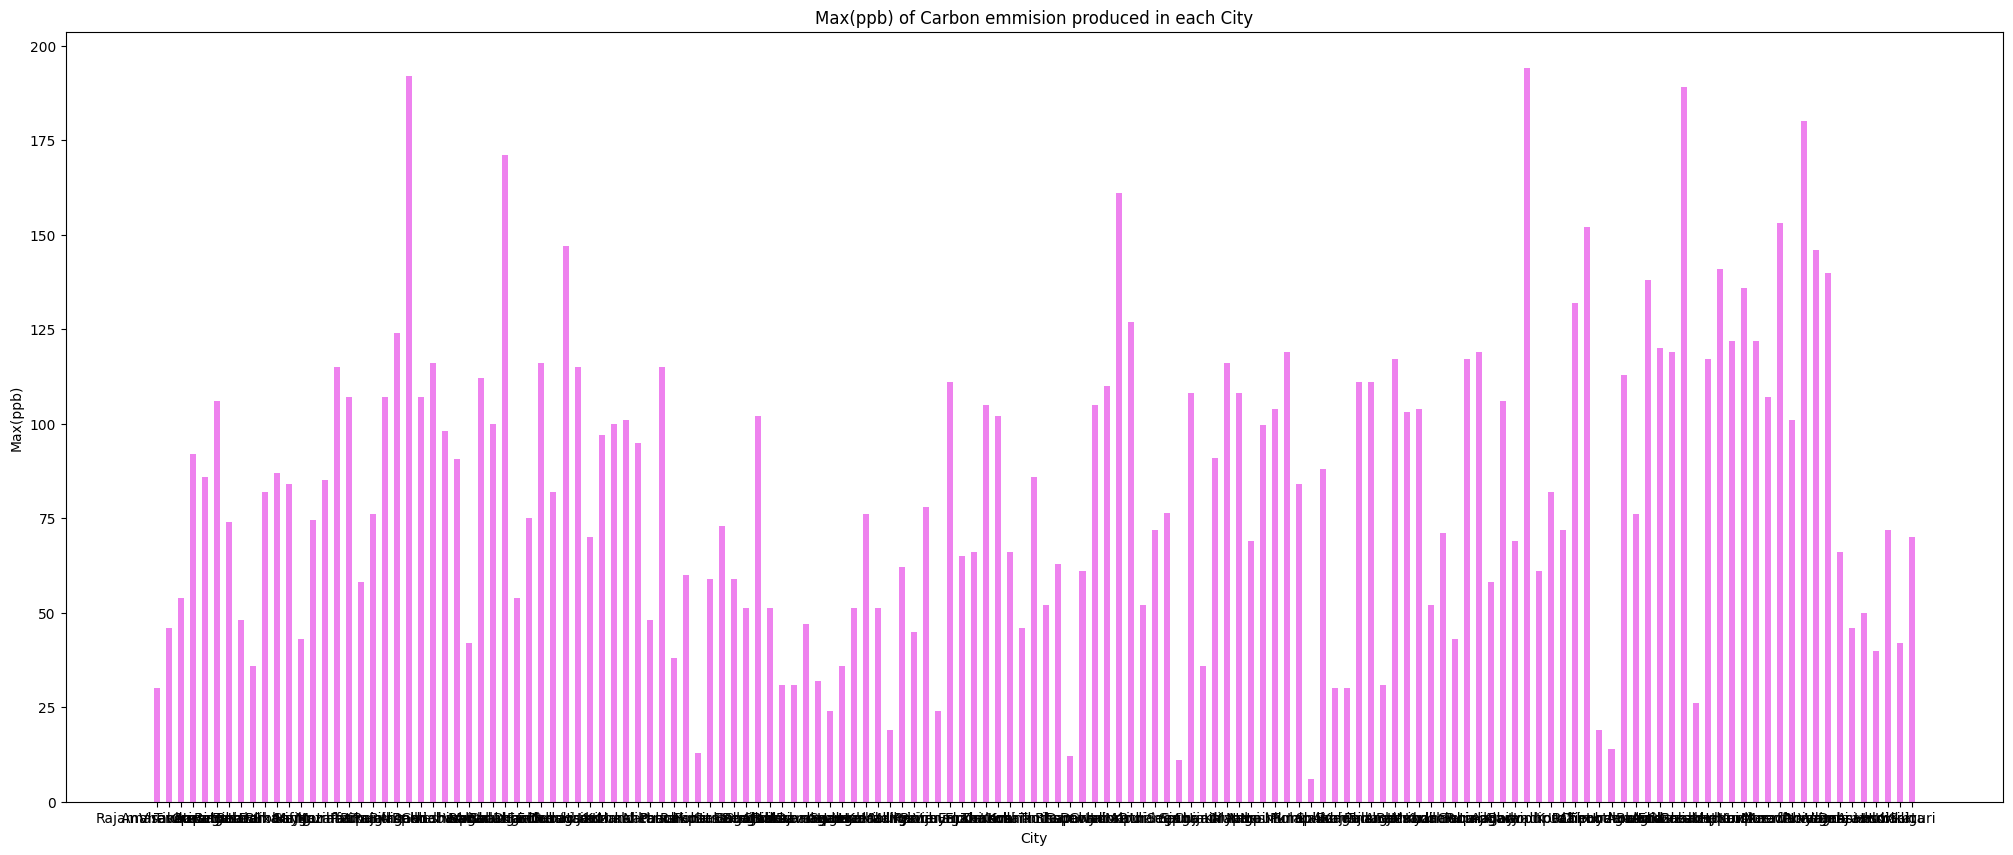

In [23]:
#Visualizing the Max(ppb) of Carbon emmision produced in each City

fig = plt.figure(figsize = (25, 10))
 

plt.bar(ds1['City'], ds1['Max(ppb)'],width = 0.5, color='violet')
 
plt.xlabel("City")
plt.ylabel("Max(ppb)")

plt.title('Max(ppb) of Carbon emmision produced in each City')

plt.show()

In [24]:
#Visualizing the Min(ppb) of Carbon emmision produced in each City

fig = px.bar(ds1, x='City', y='Min(ppb)',title="Min(ppb) of Carbon emmision produced in each City", color="Min(ppb)")
fig.show()

##### Visualizing_cities_having_the_highest_Average_Carbon_Emissions_throughout

In [25]:
high_avg = (ds1.loc[(ds1['Avg(ppb)']>100)])
high_avg

,State,City,Avg(ppb),Max(ppb),Min(ppb)
21,Delhi,Delhi,152.0,192.0,45.0
35,Haryana,Hisar,102.0,115.0,14.0
42,Haryana,Palwal,112.0,115.0,97.0
91,Maharashtra,Mumbai,101.0,108.0,99.0
95,Maharashtra,Pune,112.0,119.0,110.0
115,Rajasthan,Jaipur,102.0,194.0,102.0
128,Uttar_Pradesh,Ghaziabad,136.0,189.0,22.0
130,Uttar_Pradesh,Greater Noida,108.0,117.0,31.0
131,Uttar_Pradesh,Hapur,129.0,141.0,48.0
133,Uttar_Pradesh,Kanpur,107.0,136.0,62.0


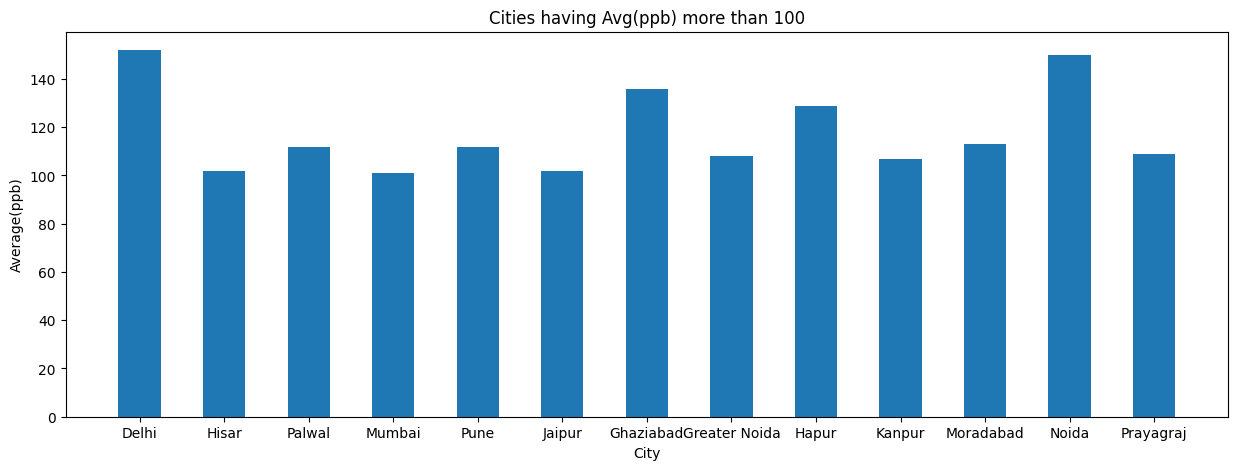

In [26]:
fig = plt.figure(figsize = (15, 5))
 

plt.bar(high_avg['City'], high_avg['Avg(ppb)'],width = 0.5)
 
plt.xlabel("City")
plt.ylabel("Average(ppb)")
plt.title("Cities having Avg(ppb) more than 100")

plt.show()

##### Visualizing_cities_having_the_lowest_Average_Carbon_Emissions_throughout

In [27]:
least_avg = (ds1.loc[(ds1['Avg(ppb)']<25)])
least_avg

,State,City,Avg(ppb),Max(ppb),Min(ppb)
1,Andhra_Pradesh,Rajamahendravaram,23.0,46.0,2.0
3,Andhra_Pradesh,Visakhapatnam,20.0,92.0,4.0
40,Haryana,Mandikhera,14.0,95.0,6.0
45,Haryana,Rohtak,11.0,13.0,8.0
52,Karnataka,Chamarajanagar,14.0,31.0,14.0
55,Karnataka,Davanagere,24.0,32.0,23.0
56,Karnataka,Gadag,18.0,24.0,17.0
57,Karnataka,Hassan,17.0,36.0,12.0
61,Karnataka,Madikeri,17.0,19.0,16.0
63,Karnataka,Mysuru,3.0,45.0,1.0


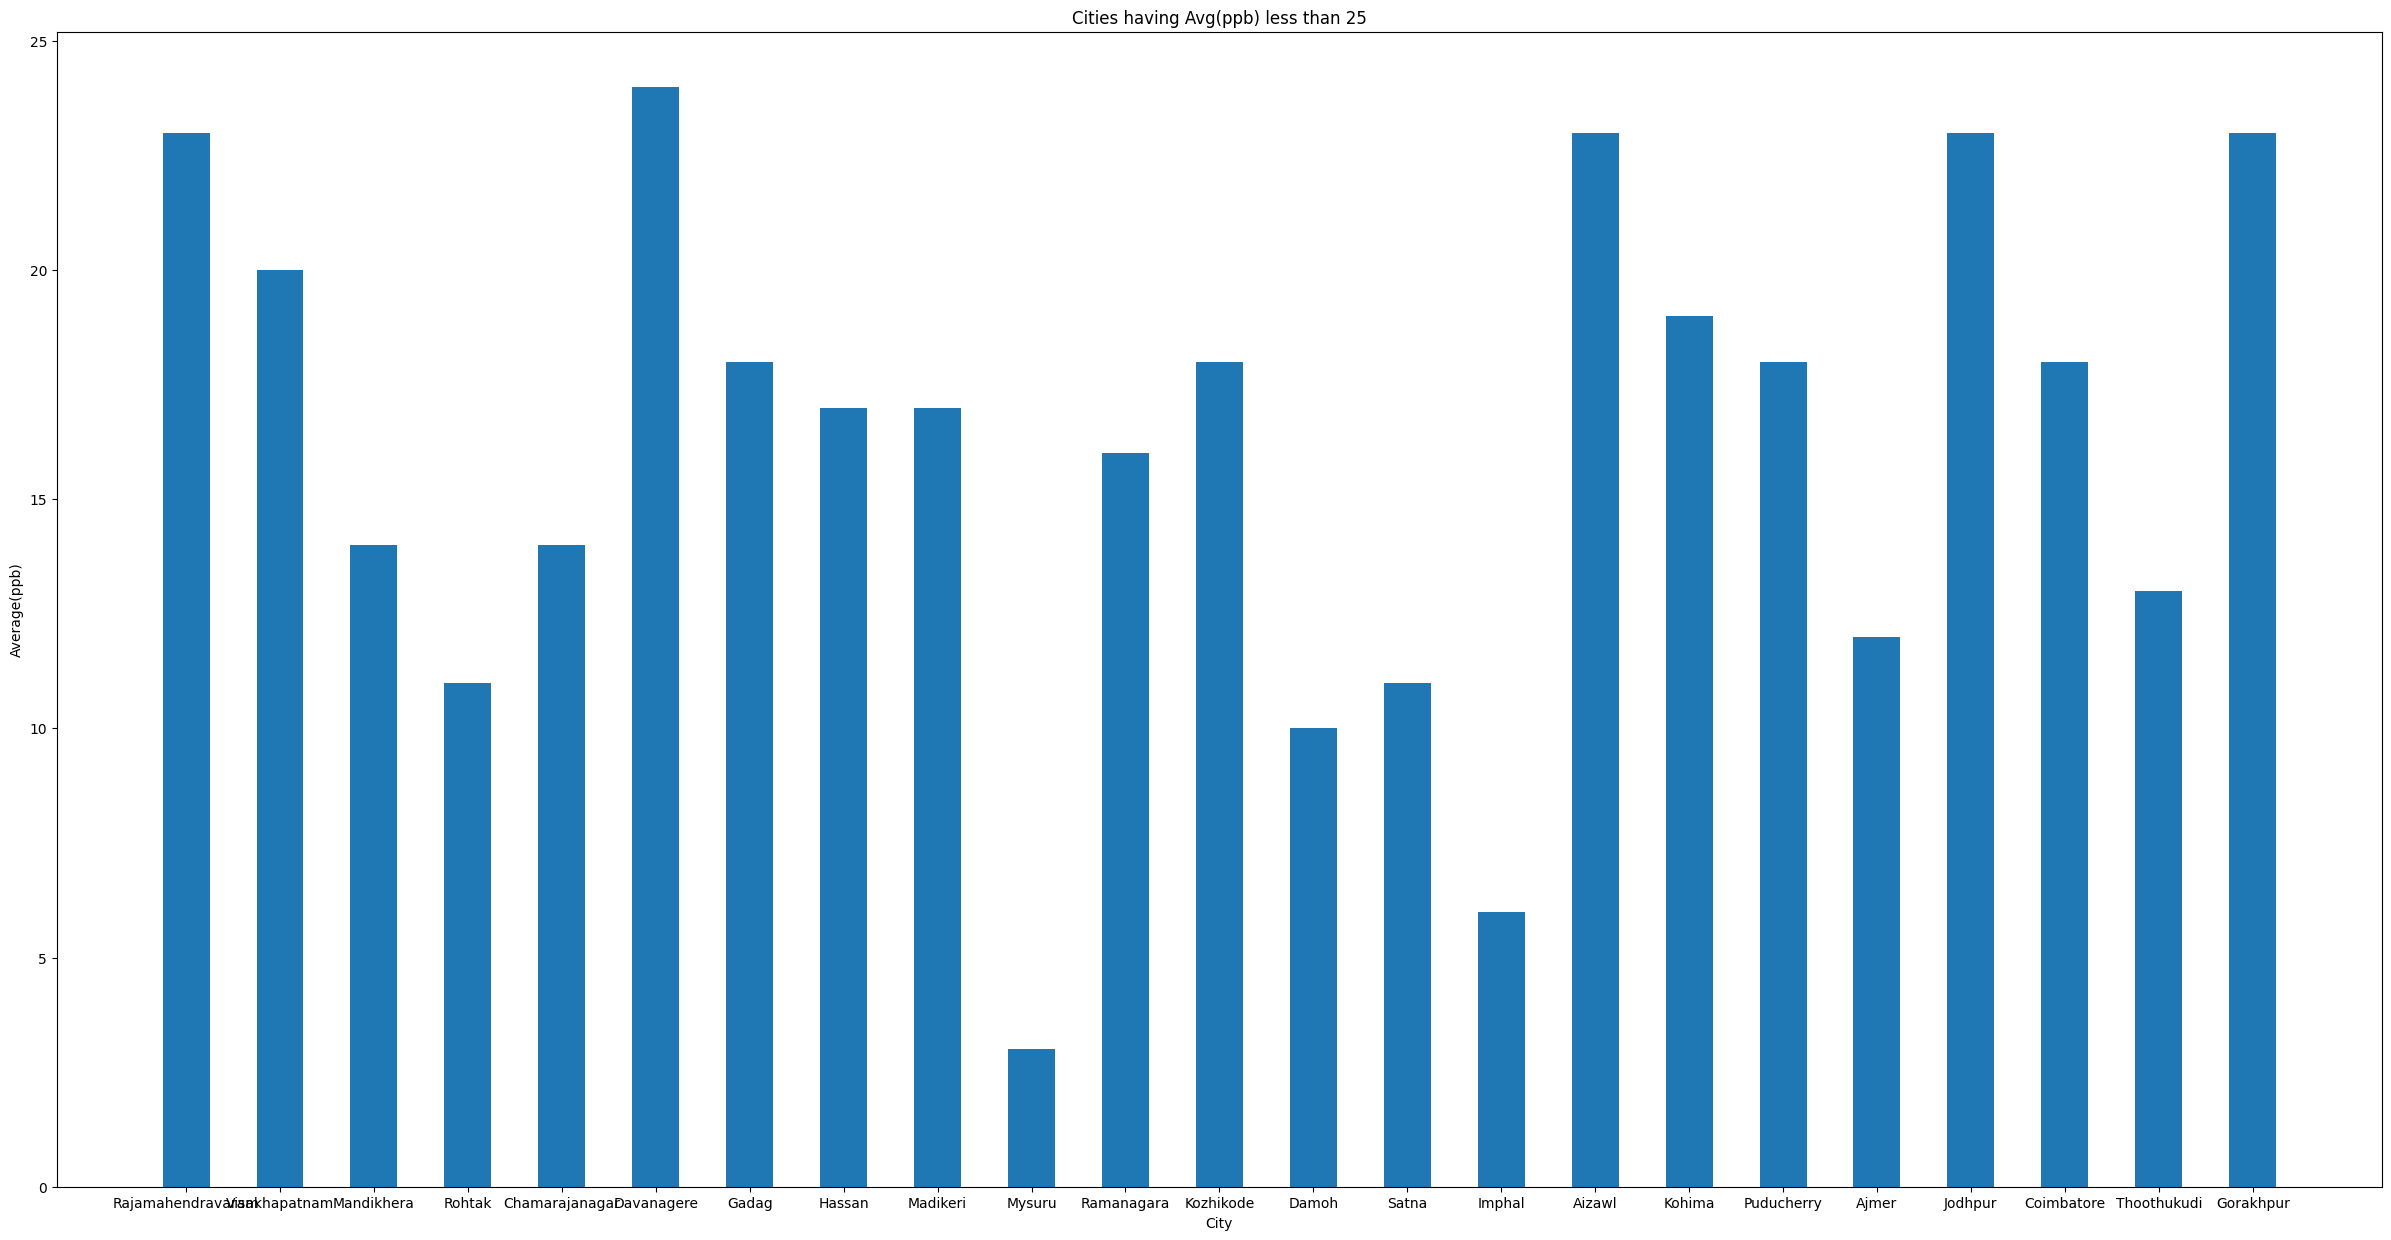

In [28]:
fig = plt.figure(figsize = (30, 15))
 

plt.bar(least_avg['City'], least_avg['Avg(ppb)'],width = 0.5)
 
plt.xlabel("City")
plt.ylabel("Average(ppb)")
plt.title("Cities having Avg(ppb) less than 25")

plt.show()

##### Visualizing_cities_having_Maximum_Carbon_Emissions

In [29]:
high_max = (ds1.loc[(ds1['Max(ppb)']>150)])
high_max

,State,City,Avg(ppb),Max(ppb),Min(ppb)
21,Delhi,Delhi,152.0,192.0,45.0
29,Haryana,Ballabgarh,76.0,171.0,22.0
80,Madhya Pradesh,Jabalpur,58.0,161.0,4.0
115,Rajasthan,Jaipur,102.0,194.0,102.0
120,TamilNadu,Chennai,60.0,152.0,36.0
128,Uttar_Pradesh,Ghaziabad,136.0,189.0,22.0
136,Uttar_Pradesh,Moradabad,113.0,153.0,60.0
138,Uttar_Pradesh,Noida,150.0,180.0,108.0


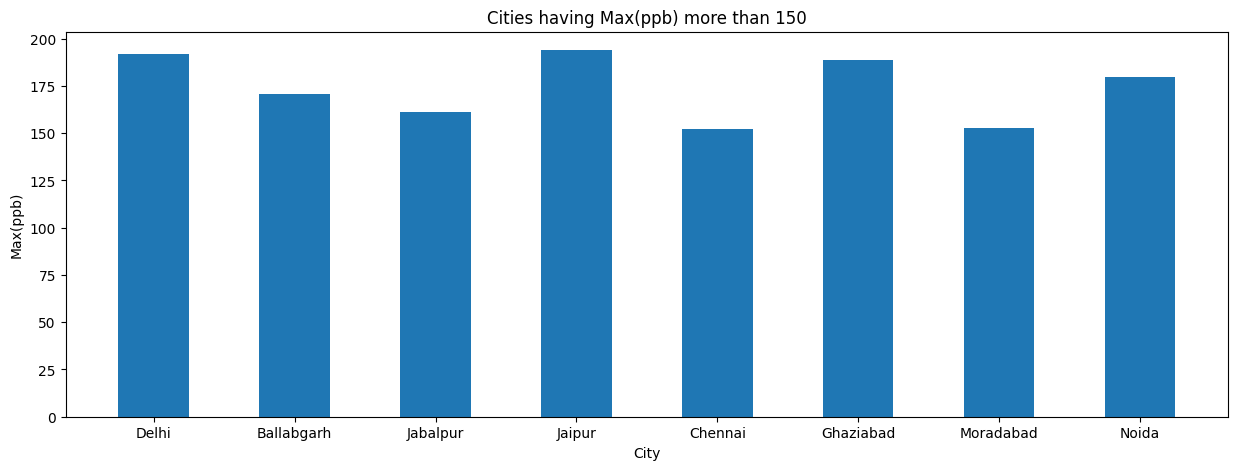

In [30]:
fig = plt.figure(figsize = (15, 5))
 

plt.bar(high_max['City'], high_max['Max(ppb)'],width = 0.5)
 
plt.xlabel("City")
plt.ylabel("Max(ppb)")
plt.title("Cities having Max(ppb) more than 150")

plt.show()

##### Visualizing_cities_having_Minimum_Carbon_Emissions

In [31]:
low_min = (ds1.loc[(ds1['Min(ppb)']<5)])
low_min

,State,City,Avg(ppb),Max(ppb),Min(ppb)
1,Andhra_Pradesh,Rajamahendravaram,23.0,46.0,2.0
3,Andhra_Pradesh,Visakhapatnam,20.0,92.0,4.0
27,Haryana,Ambala,97.0,112.0,4.0
28,Haryana,Bahadurgarh,74.0,100.0,2.0
34,Haryana,Gurugram,54.0,147.0,1.0
39,Haryana,Kurukshetra,68.0,101.0,2.0
41,Haryana,Narnaul,29.0,48.0,1.0
43,Haryana,Panchkula,34.0,38.0,1.0
63,Karnataka,Mysuru,3.0,45.0,1.0
65,Karnataka,Ramanagara,16.0,24.0,3.0


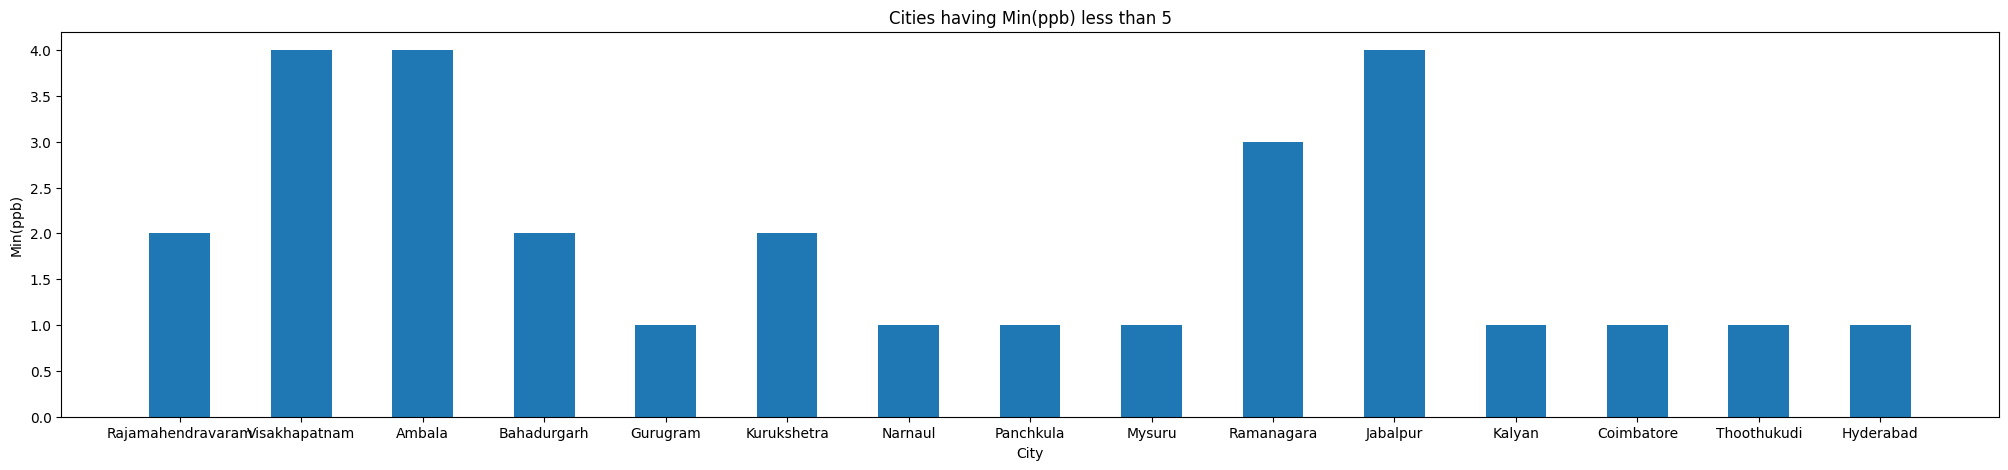

In [32]:
fig = plt.figure(figsize = (25, 5))
 

plt.bar(low_min['City'], low_min['Min(ppb)'],width = 0.5)
 
plt.xlabel("City")
plt.ylabel("Min(ppb)")
plt.title("Cities having Min(ppb) less than 5")

plt.show()

### State_wise_Visualization

In [33]:
st=[]
for i in ds1['State']:
    if i not in st:
        st.append(i)
        
state_wise_df = pd.DataFrame(st)

state_wise_df.rename(columns={0:'State'}, inplace=True)

In [34]:
a=[]
for i in st:
    a.append(state.get_group(i)['Avg(ppb)'].mean())

state_wise_df.insert(1,'Mean of Avg(ppb)', a)

In [35]:
b=[]
for i in st:
    b.append(state.get_group(i)['Max(ppb)'].mean())

state_wise_df.insert(2,'Mean of Max(ppb)', b)

In [36]:
c=[]
for i in st:
    c.append(state.get_group(i)['Min(ppb)'].mean())

state_wise_df.insert(3,'Mean of Min(ppb)', c)

In [37]:
state_wise_df

,State,Mean of Avg(ppb),Mean of Max(ppb),Mean of Min(ppb)
0,Andhra_Pradesh,28.000000,55.500000,14.250000
1,Assam,42.000000,86.000000,10.000000
2,Bihar,56.500000,74.583333,38.250000
3,Chandigarh,67.000000,107.000000,12.000000
4,Chhattisgarh,50.000000,124.000000,20.000000
5,Delhi,152.000000,192.000000,45.000000
6,Gujarat,52.000000,90.750000,36.500000
7,Haryana,57.857143,87.666667,13.750000
8,Himachal Pradesh,37.000000,59.000000,14.000000
9,Karnataka,29.142857,51.285714,22.857143


In [38]:
#add scatter plot satte wise using plotly

##### Mean Carbon Emission produced in each State

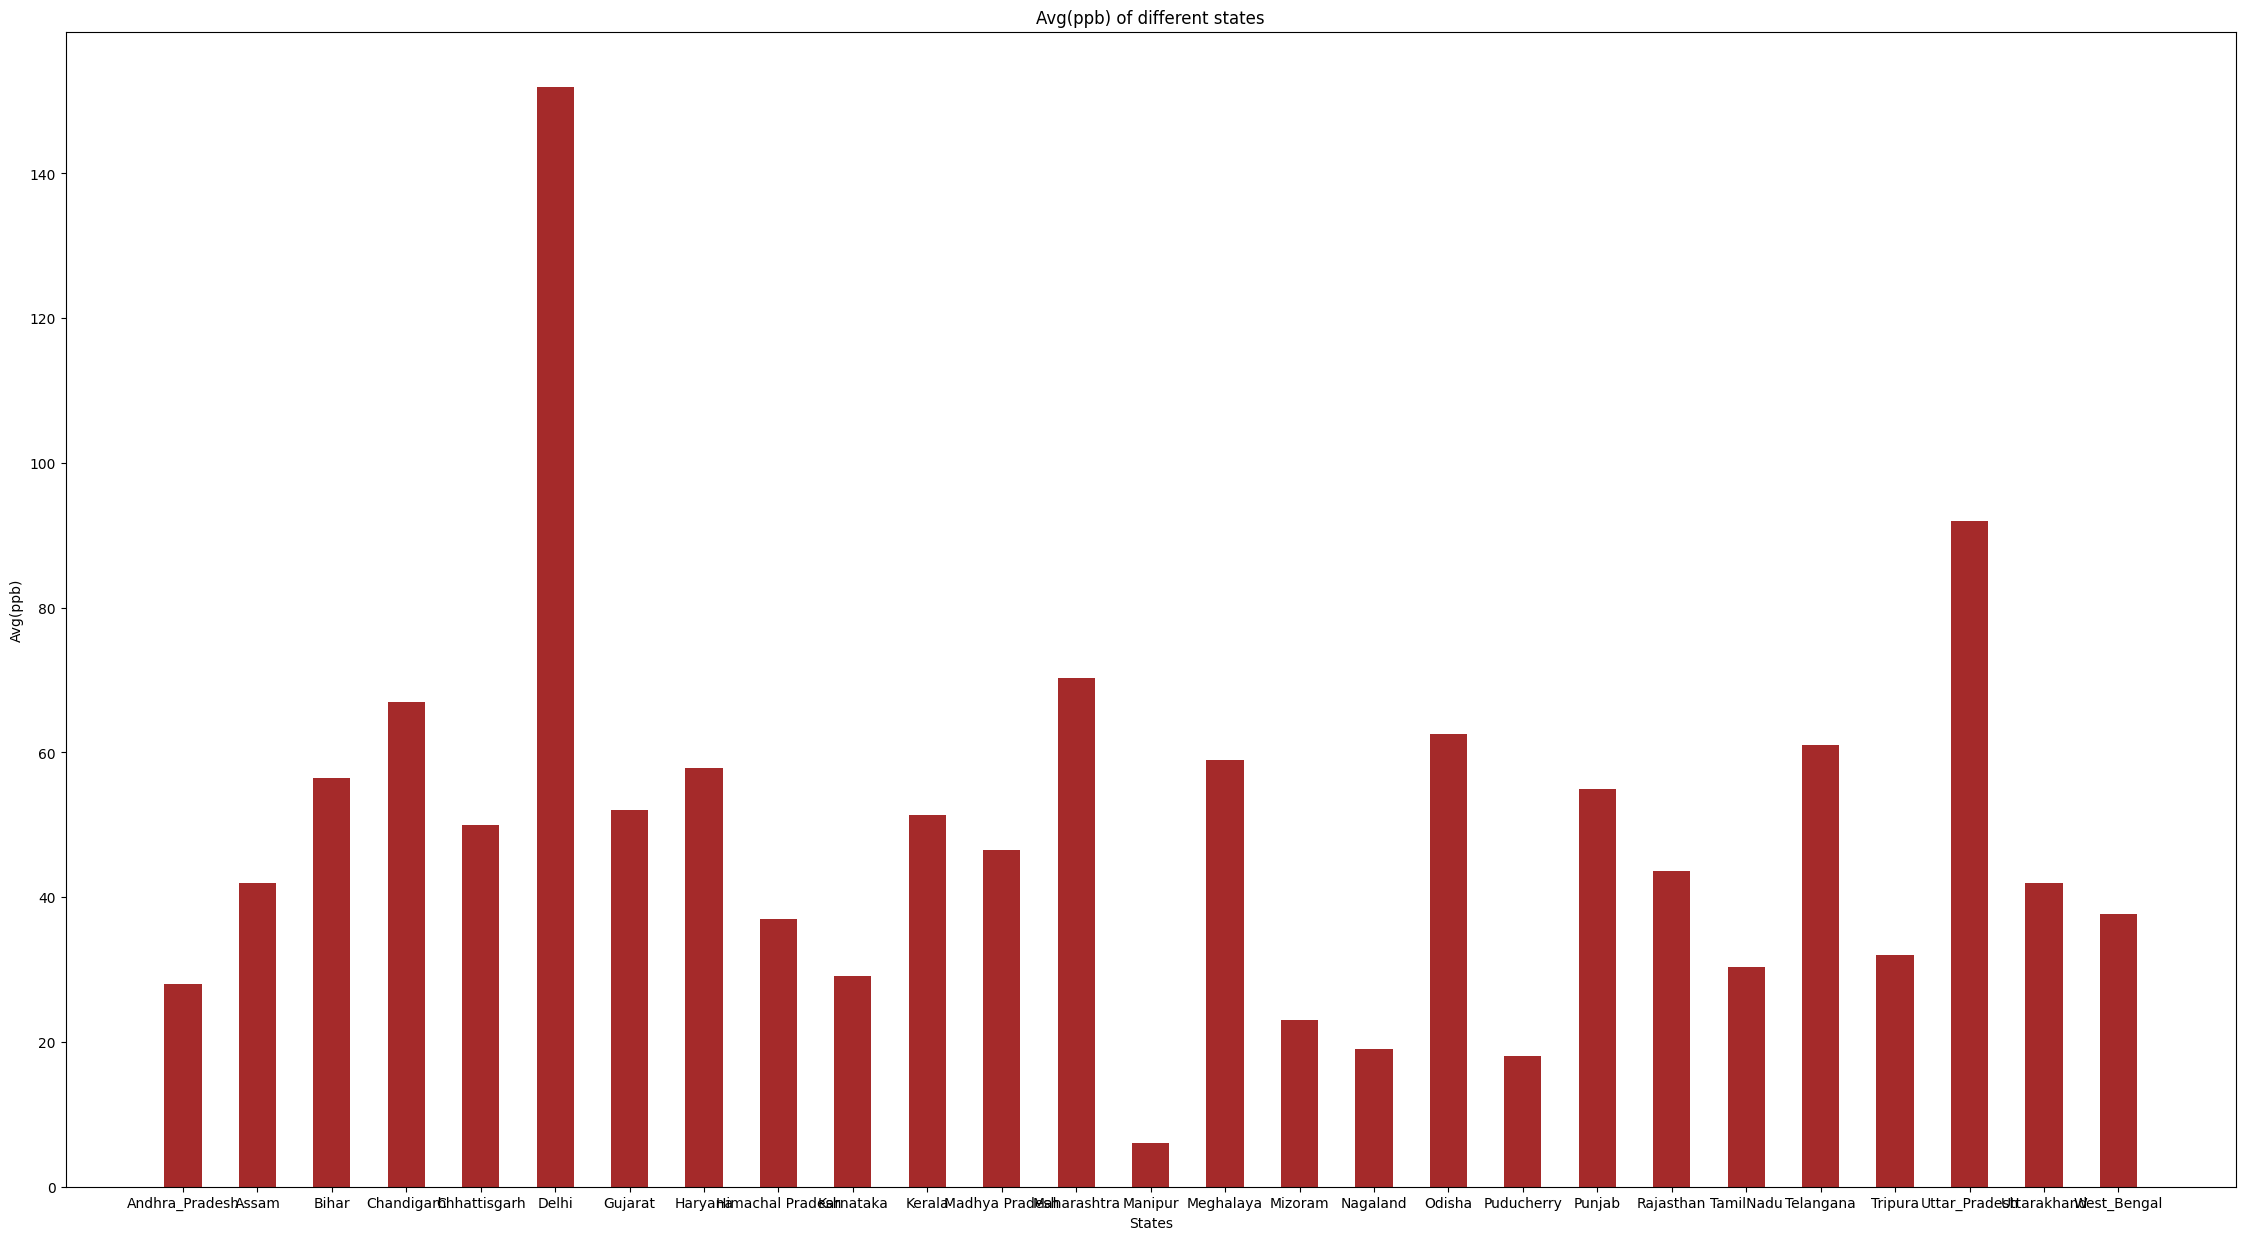

In [39]:
fig = plt.figure(figsize = (28, 15))
 

plt.bar(state_wise_df['State'], state_wise_df['Mean of Avg(ppb)'],width = 0.5, color='Brown')
 
plt.xlabel("States")
plt.ylabel("Avg(ppb)")
plt.title("Avg(ppb) of different states")

plt.show()

##### States having the highest Carbon emmission (mean)

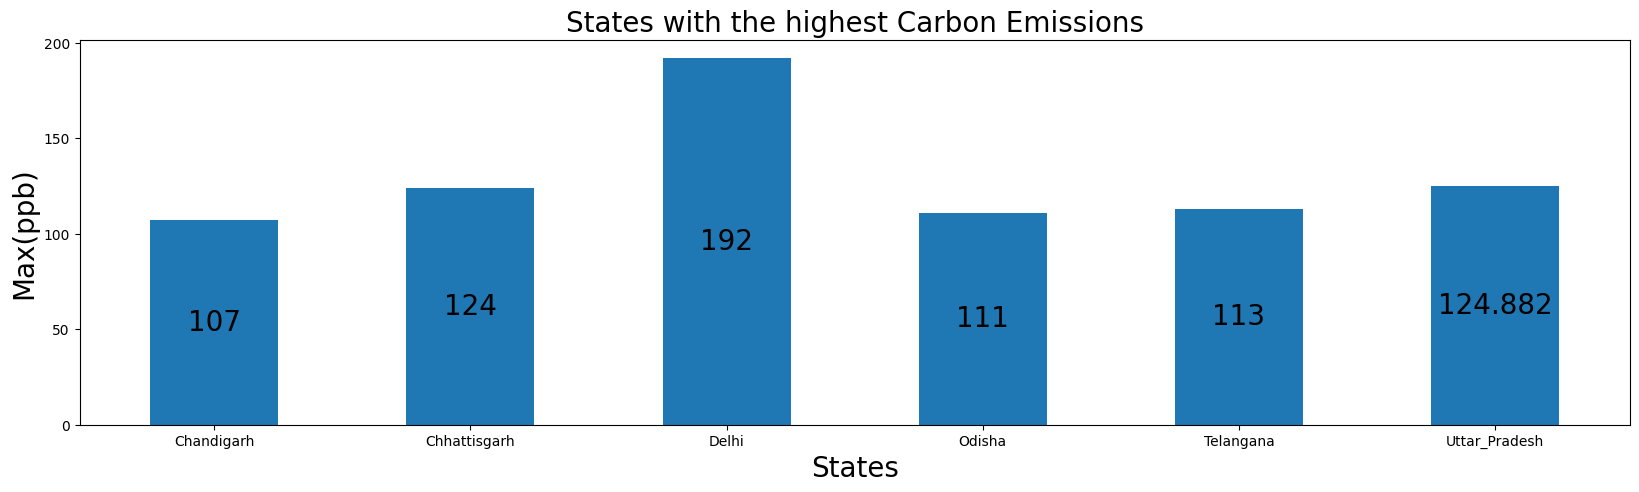

In [40]:
st_high = (state_wise_df.loc[(state_wise_df['Mean of Max(ppb)']>100)])

fig = plt.figure(figsize = (20, 5))
 

a=plt.bar(st_high['State'], st_high['Mean of Max(ppb)'],width = 0.5)
 

plt.rc('font', size=20)

plt.xlabel("States", fontsize=20)
plt.ylabel("Max(ppb)", fontsize=20)
plt.title("States with the highest Carbon Emissions",fontsize=20)

plt.bar_label(a, label_type='center')
plt.show()

# DATASET_2
>This Data Shows Month wise Carbon Dioxide Production from the years 1958-2016

In [41]:
ds2 = pd.read_csv("data2.csv")

In [42]:
ds2.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm)
0,1958,1,1958.0411,NaN,NaN
1,1958,2,1958.1260,NaN,NaN
2,1958,3,1958.2027,315.69,314.42
3,1958,4,1958.2877,317.45,315.15
4,1958,5,1958.3699,317.50,314.73


In [43]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           708 non-null    int64  
 1   Month                          708 non-null    int64  
 2   Decimal Date                   708 non-null    float64
 3   Carbon Dioxide (ppm)           693 non-null    float64
 4   Seasonally Adjusted CO2 (ppm)  698 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 27.8 KB


In [44]:
ds2.describe()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm)
count,708.000000,708.000000,708.000000,693.000000,698.000000
mean,1987.000000,6.500000,1987.497496,352.221241,352.141791
std,17.041426,3.454493,17.043871,26.096701,26.007730
min,1958.000000,1.000000,1958.041100,313.210000,314.420000
25%,1972.000000,3.750000,1972.769125,328.560000,328.927500
50%,1987.000000,6.500000,1987.495900,349.550000,349.640000
75%,2002.000000,9.250000,2002.223950,373.000000,372.362500
max,2016.000000,12.000000,2016.956300,407.650000,405.920000


## 2.1-DPL

In [45]:
import numpy as np

##### 2.1.1-Dropping_columns

In [46]:
ds2.drop('Decimal Date', axis=1, inplace=True)

In [47]:
#To get a more accurate prediction we are dropping the data for the years below 2000 since before that the carbon footprint is quite less.

count = 0
for i in ds2['Year']:
    if i<2000:
        count=count+1
ds2.drop(ds2.index[0:count], inplace=True)

ds2

,Year,Month,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm)
504,2000,1,369.14,369.12
505,2000,2,369.46,368.76
506,2000,3,370.51,369.00
507,2000,4,371.66,368.96
508,2000,5,371.83,368.61
...,...,...,...,...
703,2016,8,402.24,403.78
704,2016,9,401.01,404.52
705,2016,10,401.50,405.12
706,2016,11,403.64,405.92


In [48]:
#Checking Null vallues in each column

ds2.isna().sum()

Year                             0
Month                            0
Carbon Dioxide (ppm)             3
Seasonally Adjusted CO2 (ppm)    2
dtype: int64

##### 2.1.2-Working_with_Null_Values

In [49]:
#Grouping the Years column to extract rowas of Particular rows

years = ds2.groupby(ds2.Year)

In [50]:
#Locating Null Values in Carbon Dioxide (ppm) column

ds2.replace(np.nan, 'null', inplace=True)

data1 = ds2.loc[ds2["Carbon Dioxide (ppm)"]=='null']
data1.drop("Seasonally Adjusted CO2 (ppm)", axis=1, inplace=True)

ds2.replace('null',np.nan, inplace=True)

data1

C:\Users\tanus\AppData\Local\Temp\ipykernel_17528\1126452139.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,Carbon Dioxide (ppm)
519,2001,4,null
545,2003,6,null
695,2015,12,null


In [51]:
a = years.get_group(2001)
b = years.get_group(2003)
c = years.get_group(2015)

print(f"{a}\n{b}\n{c}")

     Year  Month  Carbon Dioxide (ppm)  Seasonally Adjusted CO2 (ppm)
516  2001      1                370.28                         370.26
517  2001      2                371.50                         370.79
518  2001      3                372.12                         370.63
519  2001      4                   NaN                         370.18
520  2001      5                374.02                         370.79
521  2001      6                373.31                         370.86
522  2001      7                371.62                         370.81
523  2001      8                369.55                         371.00
524  2001      9                367.96                         371.29
525  2001     10                368.10                         371.55
526  2001     11                369.68                         371.86
527  2001     12                371.24                         372.14
     Year  Month  Carbon Dioxide (ppm)  Seasonally Adjusted CO2 (ppm)
540  2003      1    

In [52]:
ds2['Carbon Dioxide (ppm)'].loc[516:527].fillna(value=a["Carbon Dioxide (ppm)"].mean(), inplace=True)

ds2['Carbon Dioxide (ppm)'].loc[540:551].fillna(value=b["Carbon Dioxide (ppm)"].mean(), inplace=True)

ds2['Carbon Dioxide (ppm)'].loc[684:695].fillna(value=c["Carbon Dioxide (ppm)"].mean(), inplace=True)

In [53]:
#Locating Null Values in Seasonally Adjusted CO2 (ppm) column

ds2.replace(np.nan, 'null', inplace=True)


data2 = ds2.loc[ds2["Seasonally Adjusted CO2 (ppm)"]=='null']
data2.drop("Carbon Dioxide (ppm)", axis=1, inplace=True)

ds2.replace('null',np.nan, inplace=True)

print(data2.count())
data2

Year                             2
Month                            2
Seasonally Adjusted CO2 (ppm)    2
dtype: int64


C:\Users\tanus\AppData\Local\Temp\ipykernel_17528\2597387928.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,Seasonally Adjusted CO2 (ppm)
596,2007,9,null
678,2014,7,null


In [54]:
a = years.get_group(2007)
b = years.get_group(2014)

print(f"{a}\n{b}")

     Year  Month  Carbon Dioxide (ppm)  Seasonally Adjusted CO2 (ppm)
588  2007      1                382.58                         382.56
589  2007      2                383.71                         383.00
590  2007      3                384.34                         382.82
591  2007      4                386.23                         383.49
592  2007      5                386.41                         383.12
593  2007      6                385.87                         383.37
594  2007      7                384.45                         383.63
595  2007      8                381.84                         383.32
596  2007      9                380.86                            NaN
597  2007     10                380.86                         384.38
598  2007     11                382.35                         384.58
599  2007     12                383.61                         384.53
     Year  Month  Carbon Dioxide (ppm)  Seasonally Adjusted CO2 (ppm)
672  2014      1    

In [55]:
#Filling Null Values for the Year 2007
ds2['Seasonally Adjusted CO2 (ppm)'].loc[588:599].fillna(value=a["Seasonally Adjusted CO2 (ppm)"].mean(), inplace=True)

#Filling Null Values for the Year 2014
ds2['Seasonally Adjusted CO2 (ppm)'].loc[672:683].fillna(value=b["Seasonally Adjusted CO2 (ppm)"].mean(), inplace=True)

In [56]:
#Checking to see if there are any remainig Null Values

ds2.isna().sum()

Year                             0
Month                            0
Carbon Dioxide (ppm)             0
Seasonally Adjusted CO2 (ppm)    0
dtype: int64

In [57]:
ds2

,Year,Month,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm)
504,2000,1,369.14,369.12
505,2000,2,369.46,368.76
506,2000,3,370.51,369.00
507,2000,4,371.66,368.96
508,2000,5,371.83,368.61
...,...,...,...,...
703,2016,8,402.24,403.78
704,2016,9,401.01,404.52
705,2016,10,401.50,405.12
706,2016,11,403.64,405.92


## 2.2-EDAL/PDSL

In [58]:
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go

In [59]:
yr=[]
for i in ds2['Year']:
    if i not in yr:
        yr.append(i)
        
year_wise_df = pd.DataFrame(yr)

year_wise_df.rename(columns={0:'Year'}, inplace=True)

In [60]:
a=[]
for j in yr:
    a.append(round(years.get_group(j)['Carbon Dioxide (ppm)'].mean(),2))

year_wise_df.insert(1,'Mean of Carbon Dioxide (ppm)', a)

In [61]:
b=[]
for j in yr:
    b.append(round(years.get_group(j)['Seasonally Adjusted CO2 (ppm)'].mean(),2))

year_wise_df.insert(2,'Mean of Seasonally Adjusted CO2 (ppm)', b)

In [62]:
year_wise_df

,Year,Mean of Carbon Dioxide (ppm),Mean of Seasonally Adjusted CO2 (ppm)
0,2000,369.47,369.47
1,2001,370.85,371.01
2,2002,373.10,373.09
3,2003,375.41,375.63
4,2004,377.36,377.36
5,2005,379.61,379.60
6,2006,381.81,381.80
7,2007,383.59,383.53
8,2008,385.45,385.45
9,2009,387.36,387.35


In [63]:
#Visulaization of Year wise CO2 emitted

fig =px.sunburst(
    year_wise_df,
    path=['Mean of Carbon Dioxide (ppm)','Year'],
    values='Mean of Carbon Dioxide (ppm)',
    color='Mean of Carbon Dioxide (ppm)',
    color_continuous_scale='RdBu',)
fig.show()


In [64]:
#Visulaization of Mean of Seasonally Adjusted CO2 per Year

fig =px.sunburst(
    year_wise_df,
    path=['Mean of Seasonally Adjusted CO2 (ppm)','Year'],
    values='Mean of Seasonally Adjusted CO2 (ppm)',
    color='Mean of Seasonally Adjusted CO2 (ppm)')
fig.show()

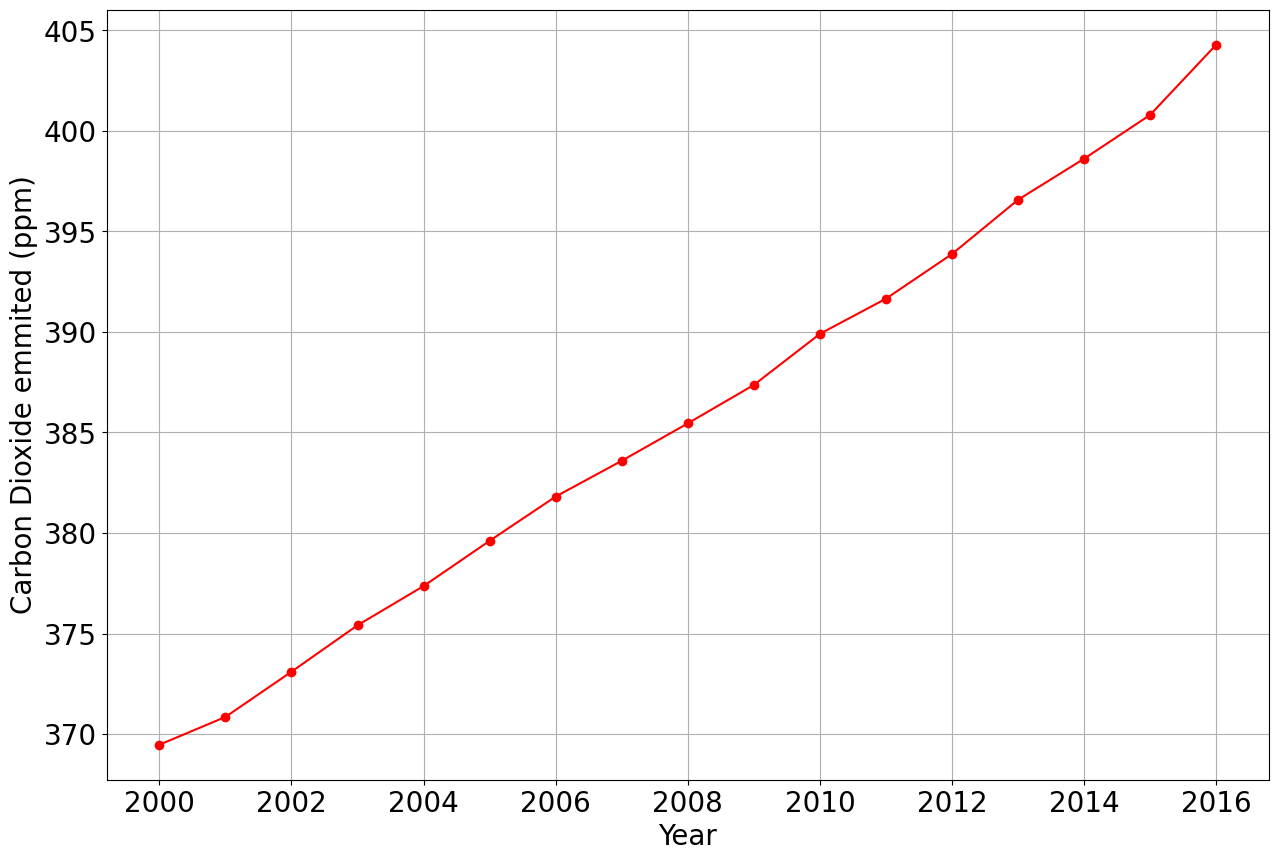

In [65]:
x1=year_wise_df['Year']
y1=year_wise_df["Mean of Carbon Dioxide (ppm)"]

plt.figure(figsize = (15, 10))

plt.plot(x1, y1, c='r',linewidth = '1.5', marker='o')
plt.xlabel("Year")
plt.ylabel("Carbon Dioxide emmited (ppm)")

plt.grid()
plt.show()

From the graph above we can see that crbon emissions through the years has been continously increasing and this is not a great sign for our future.

Prediction Model

In [66]:
#new_row = pd.Series(data={'Year':2017,'Mean of Carbon Dioxide (ppm)':np.nan,'Mean of Seasonally Adjusted CO2 (ppm)':np.nan })

#year_wise_df.append(new_row, ignore_index=True)

In [67]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [68]:
X=year_wise_df['Year'].values.reshape(-1,1)
y=year_wise_df['Mean of Carbon Dioxide (ppm)'].values.reshape(-1,1)

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.6, random_state=0)

rg= LinearRegression()
rg.fit(X_train, y_train)

y_pred=rg.predict(X_test)

pred_list=[]

for i in range(2000,2025):
    pred_list.append(i)

pred_list=np.array(pred_list).reshape(-1,1)
pred=rg.predict(pred_list)

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9957504399376055

In [72]:
X

array([[2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016]], dtype=int64)

In [69]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=pred_list.reshape(-1), y=pred.reshape(-1), mode="lines", line_color='red', name='Predicted'))
fig.add_trace(go.Scatter(x=X_test.reshape(-1), y=y_test.reshape(-1), mode="markers", line_color='blue', name='Actual'))
fig.update_layout(title='Predicted vs Actual', legend=dict(x=0,y=1), xaxis_title='Date', yaxis_title='Count', margin=dict(l=0,r=0,t=50,b=50))

In [79]:
import pickle 
pickle_out = open("carbon_model.pkl", mode = "wb") 
pickle.dump(rg, pickle_out) 
pickle_out.close()

In [77]:
yr= list(input("Enter a year whose predicted Carbon Emission you wanat to find: "))

y_pred = rg.predict([yr]).reshape(-1,1)
y_pred

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.